This is testing data taken with raw ADC values before the ADC to voltage conversion was implemented.

In [1]:
from EKA import muon_lifetime

In [2]:
directory = '/Users/daniel/Columbia/Teaching/Advanced Lab/Muon Lifetime/data/20141022T195301'

In [3]:
pattern = muon_lifetime.new_file_pattern

In [4]:
files = muon_lifetime.find_files(directory, pattern)

In [5]:
data = muon_lifetime.load_files(directory, pattern)

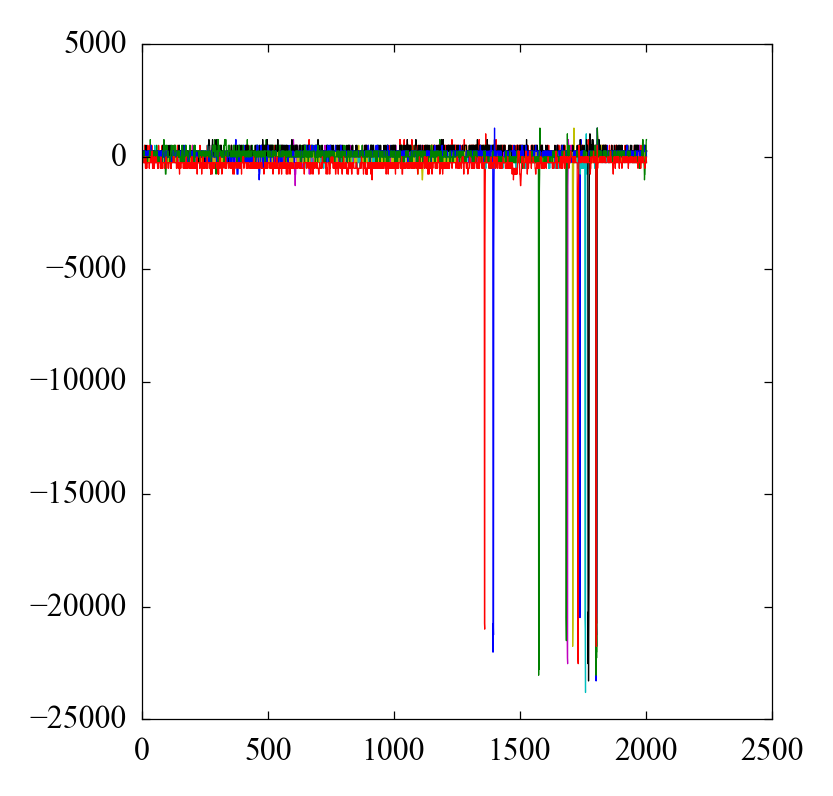

In [6]:
for n in range(10):
    plt.plot(data[n])

The default padding of 5 samples doesn't cover two triple-spike sweeps:

In [7]:
ds = muon_lifetime.apply(data, lambda a: muon_lifetime.delay(a, padding=10))

In [8]:
dt = 1e6 * ds / muon_lifetime.sample_frequency

(0, 2)

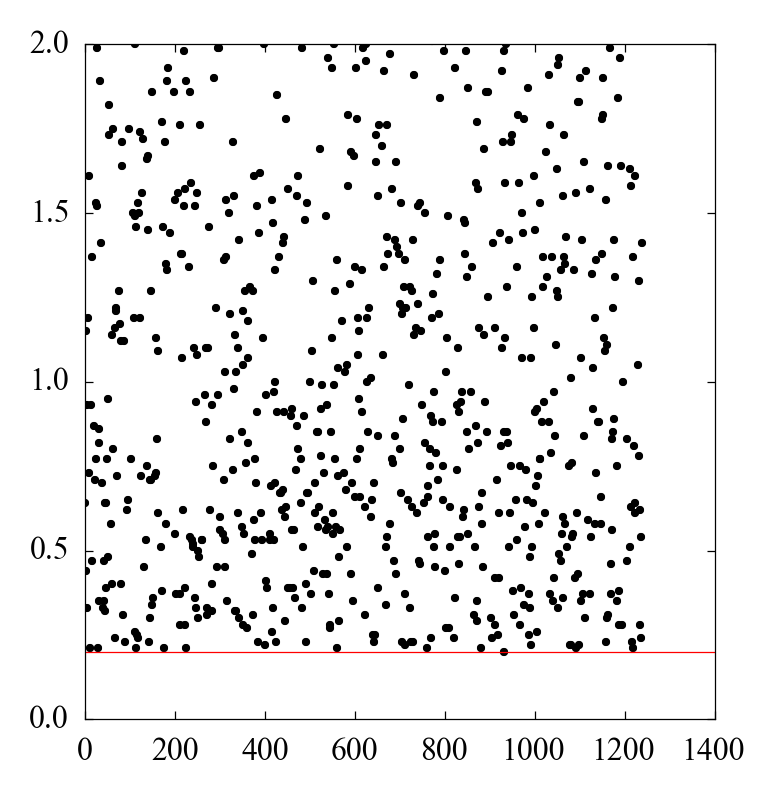

In [9]:
plt.plot(dt, '.k')
plt.plot([0, 1400], [0.2, 0.2], '-r')
plt.ylim(0, 2)

In [10]:
smallest = data[np.argmin(ds)]

(1500, 2000)

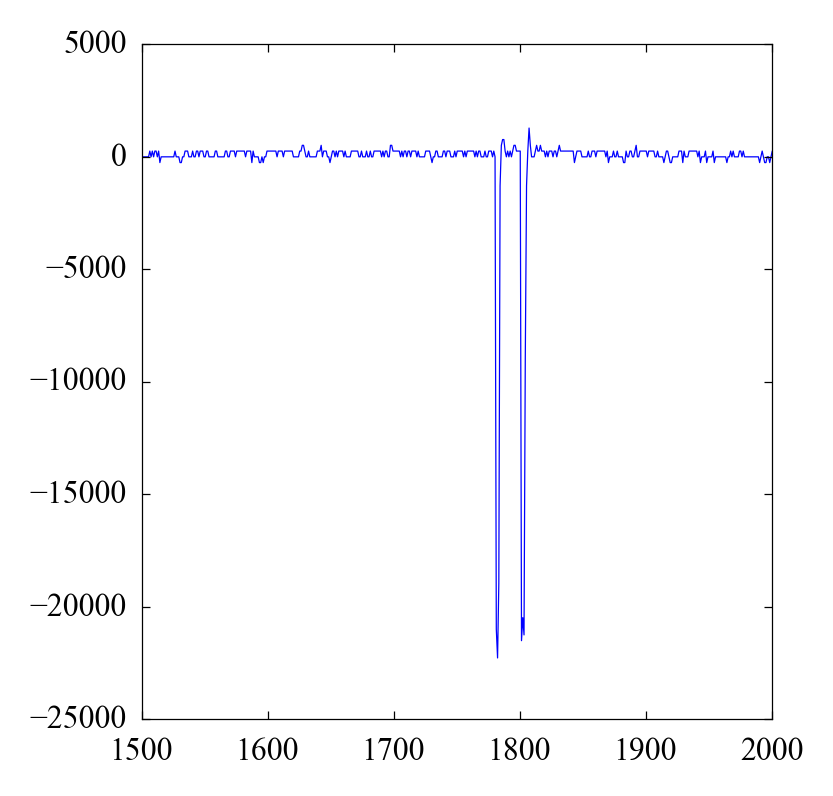

In [11]:
plt.plot(smallest)
plt.xlim(1500, 2000)

In [12]:
counts, bins = np.histogram(dt, bins=15)

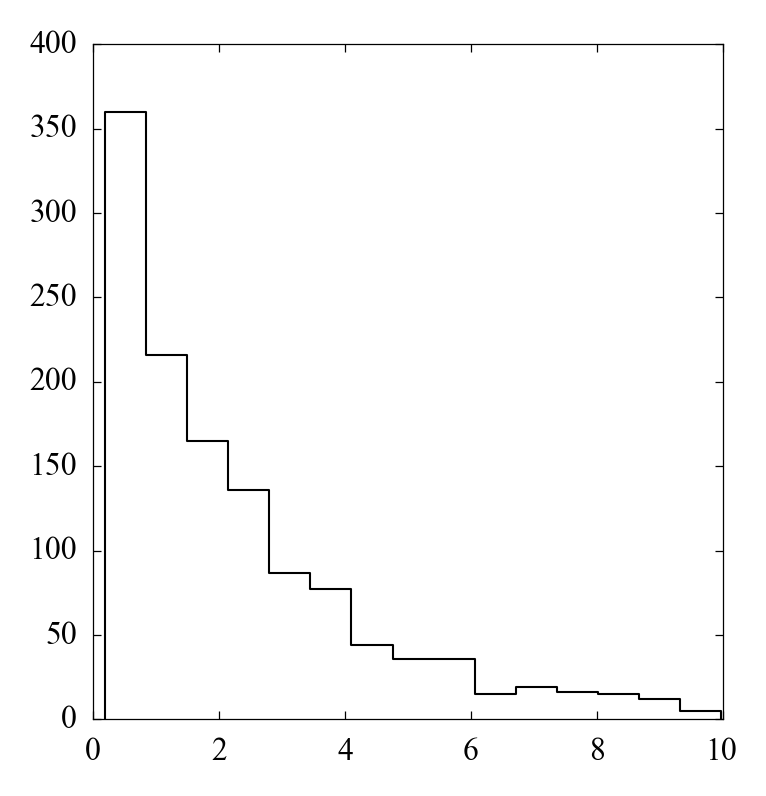

In [13]:
fig, ax = plt.subplots()
muon_lifetime.histogram(ax, bins, counts, linewidth=0.5, color='black')

In [14]:
min(counts)

5

In [15]:
result = muon_lifetime.fit(bins, counts/counts.sum(), muon_lifetime.true_value)

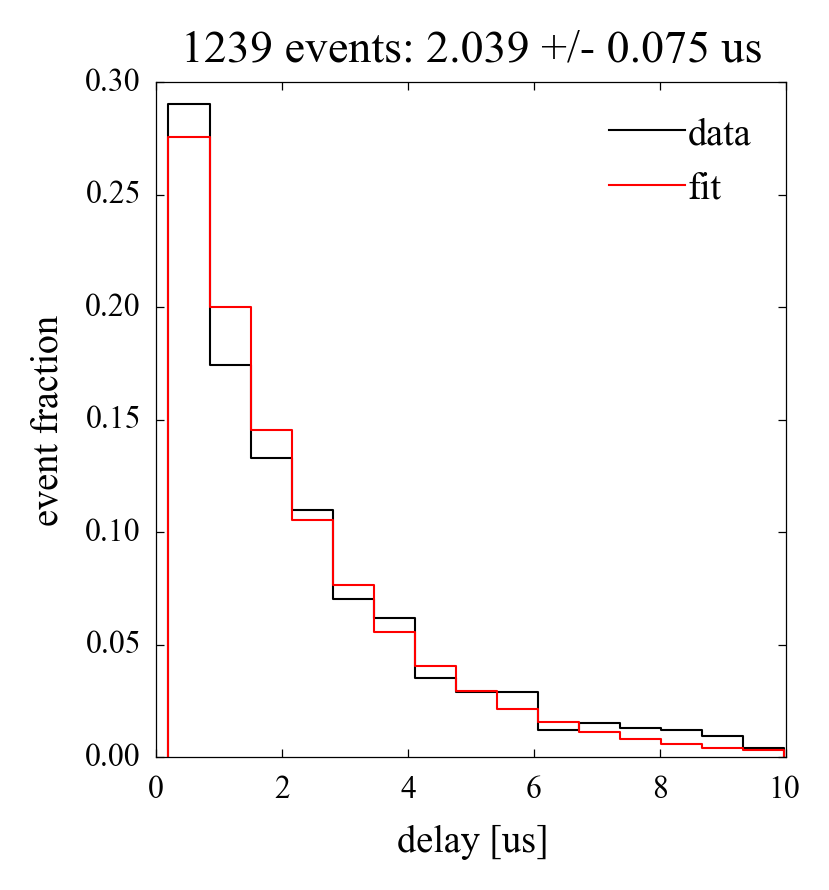

In [16]:
fig = muon_lifetime.plot_fit(bins, counts/counts.sum(), muon_lifetime.model, result.params, counts.sum())

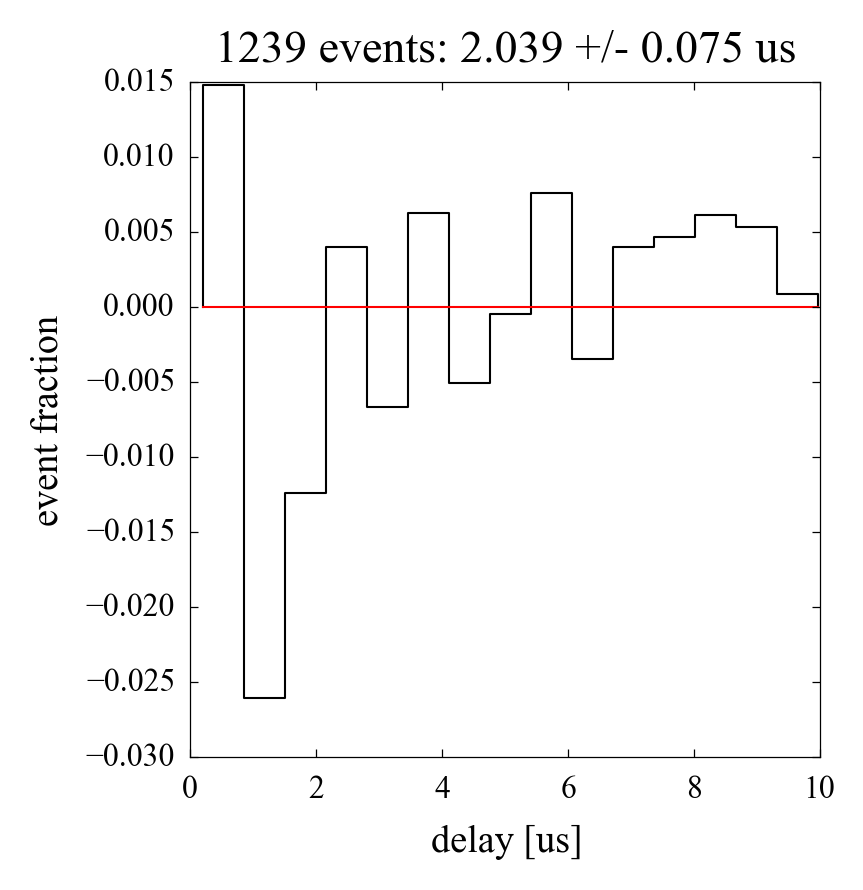

In [17]:
fig = muon_lifetime.plot_residuals(bins, counts/counts.sum(), muon_lifetime.model, result.params, counts.sum())